In [112]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

drug_list= ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
merged_df =mouse_data.merge(clinical_data)


# Display the data table for preview

merged_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [113]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = (merged_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol).reset_index()
# Preview DataFrame
mean_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [114]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_standard_err = (merged_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'])
# Convert to DataFrame
tumor_vol_standard_err_df = pd.DataFrame(tumor_vol_standard_err).reset_index
# Preview DataFrame
tumor_vol_standard_err_df


<bound method DataFrame.reset_index of                      Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
 

In [115]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_grouped_df =mean_tumor_vol_df.set_index(['Timepoint','Drug']).unstack()
# Preview that Reformatting worked
mean_tumor_vol_grouped_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [116]:
mean_tumor_vol_grouped_df.reindex()
mean_tumor_vol_grouped_df.columns.levels[1]

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

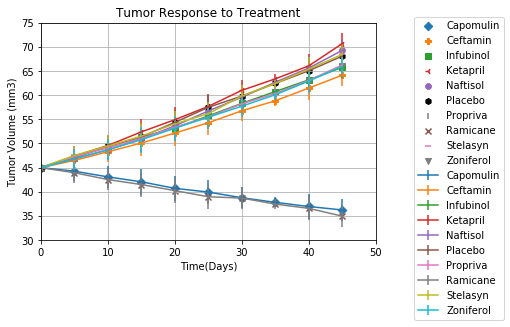

In [117]:
# Generate the Plot (with Error Bars)

plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Capomulin"], marker="D")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Ceftamin"], marker="P")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Infubinol"], marker="s")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Ketapril"], marker="3")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Naftisol"], marker="8")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Placebo"], marker="h", color="black")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Propriva"], marker="|", color='grey')
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Ramicane"], marker="x")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Stelasyn"], marker="_")
plt.scatter(mean_tumor_vol_grouped_df.index.values, mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Zoniferol"], marker="v")

#generate error bars for each Drug scatter plot
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Capomulin"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Ceftamin"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Infubinol"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Ketapril"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Naftisol"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Placebo"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Propriva"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Ramicane"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Stelasyn"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(mean_tumor_vol_grouped_df.index.values, 
             mean_tumor_vol_grouped_df["Tumor Volume (mm3)"]["Zoniferol"], 
             yerr=mean_tumor_vol_grouped_df.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

# Incorporate the other graph properties
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time(Days)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylim([30,75])
plt.xlim([0,50])

# Show plot
plt.show()





In [118]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [119]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_tumor_meta = (merged_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
mean_tumor_meta = mean_tumor_meta.reset_index()
mean_tumor_meta = mean_tumor_meta.set_index(['Drug','Timepoint'])
# Preview DataFrame
mean_tumor_meta





Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [120]:
err_tumor_meta = (merged_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
err_tumor_meta= err_tumor_meta.reset_index()
err_tumor_meta =err_tumor_meta.set_index(['Drug','Timepoint'])
# Preview DataFrame
err_tumor_meta

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [121]:

# Minor Data Munging to Re-Format the Data Frames
mean_tumor_meta = mean_tumor_meta.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
err_tumor_meta= err_tumor_meta.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
mean_tumor_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


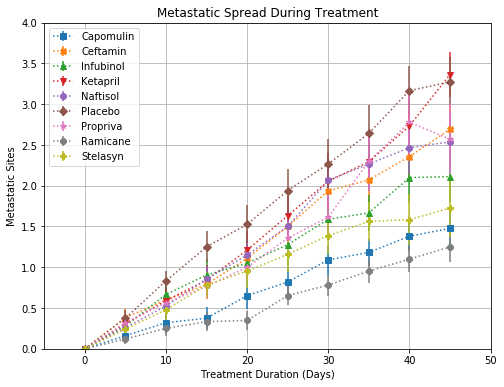

In [122]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Metastatic Spread During Treatment')
ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Metastatic Sites')
ax.set_xlim((-5,50))
ax.set_ylim((0.0,4.0))
ax.grid(True)
markers = ['s','X','^','v','o','D','*','8','P']
for col,mark in zip(mean_tumor_meta.columns,markers):
    ax.errorbar(mean_tumor_meta.index,mean_tumor_meta.loc[:,col],
                yerr=err_tumor_meta.loc[:,col],linestyle='dotted',marker=mark)
ax.legend(mean_tumor_meta,loc='upper left')
plt.savefig('metastatic_change.png')
plt.show() 

## Survival Rates

In [123]:
# Store the Count of Mice Grouped by Drug and Timepoint
group_count_df = pd.DataFrame(merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID'])
group_count_df.reset_index(inplace=True)

# Convert to DataFrame

# Preview DataFrame
group_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [124]:
group_count_df_unstack =group_count_df.set_index(['Timepoint','Drug']).unstack()
group_count_df_unstack

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [125]:
#reindex after unstack
group_count_df_unstack.reindex()
group_count_df_unstack.columns.levels[1]

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

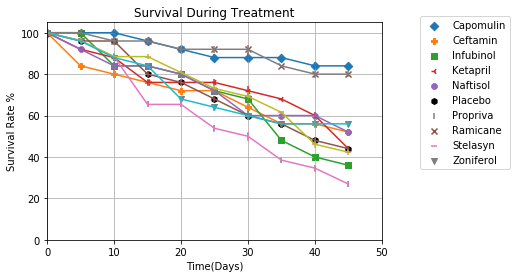

In [126]:
# Build the Plot (out of 100%)
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Capomulin"]/group_count_df_unstack["Mouse ID"]["Capomulin"][0]*100, marker="D")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Ceftamin"]/group_count_df_unstack["Mouse ID"]["Ceftamin"][0]*100, marker="P")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Infubinol"]/group_count_df_unstack["Mouse ID"]["Infubinol"][0]*100, marker="s")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Ketapril"]/group_count_df_unstack["Mouse ID"]["Ketapril"][0]*100, marker="3")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Naftisol"]/group_count_df_unstack["Mouse ID"]["Naftisol"][0]*100, marker="8")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Placebo"]/group_count_df_unstack["Mouse ID"]["Placebo"][0]*100, marker="h", color="black")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Propriva"]/group_count_df_unstack["Mouse ID"]["Propriva"][0]*100, marker="|", color='grey')
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Ramicane"]/group_count_df_unstack["Mouse ID"]["Ramicane"][0]*100, marker="x")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Stelasyn"]/group_count_df_unstack["Mouse ID"]["Stelasyn"][0]*100, marker="_")
plt.scatter(group_count_df_unstack.index.values, 
            group_count_df_unstack["Mouse ID"]["Zoniferol"]/group_count_df_unstack["Mouse ID"]["Zoniferol"][0]*100, marker="v")

# Incorporate the other graph properties
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate %")
plt.xlabel("Time(Days)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylim([0,105])
plt.xlim([0,50])

#generate error bars
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Capomulin"]/group_count_df_unstack["Mouse ID"]["Capomulin"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Ceftamin"]/group_count_df_unstack["Mouse ID"]["Ceftamin"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Infubinol"]/group_count_df_unstack["Mouse ID"]["Infubinol"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Ketapril"]/group_count_df_unstack["Mouse ID"]["Ketapril"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Naftisol"]/group_count_df_unstack["Mouse ID"]["Naftisol"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Placebo"]/group_count_df_unstack["Mouse ID"]["Placebo"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Propriva"]/group_count_df_unstack["Mouse ID"]["Propriva"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Ramicane"]/group_count_df_unstack["Mouse ID"]["Ramicane"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Stelasyn"]/group_count_df_unstack["Mouse ID"]["Stelasyn"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))
plt.errorbar(group_count_df_unstack.index.values, 
             group_count_df_unstack["Mouse ID"]["Zoniferol"]/group_count_df_unstack["Mouse ID"]["Zoniferol"][0]*100, 
             yerr=group_count_df_unstack.sem(axis=None, skipna=None, level=None, ddof=1, numeric_only=None))

# Show plot
plt.show()

## Summary Bar Graph

In [127]:
# Calculate the percent changes for each drug
drug_percent_change = list(round((mean_tumor_vol_grouped_df.loc[45]-45)/45*100,2))
drug_percent_change.insert(1, drug_percent_change.pop(7))
drug_percent_change = tuple(drug_percent_change)
# Display the data to confirm
drug_percent_change


(-19.48, -22.32, 42.52, 46.12, 57.03, 53.92, 51.3, 47.24, 52.09, 46.58)

[0 1 2 3]
('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')


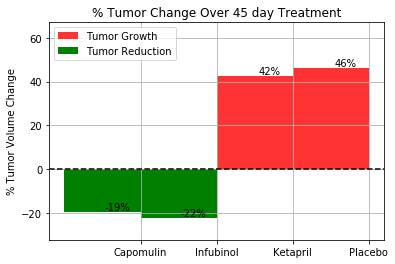

In [128]:
# Store all Relevant Percent Changes into a Tuple
tuple_data=tuple(drug_list)
objects = (tuple_data)
tuple_data_dom = np.arange(len(objects))
# Splice the data between passing and failing drugs
plt.ylim(min(drug_percent_change)-10,max(drug_percent_change)+10)



# Use functions to label the percentages of changes
for drug in range(len(drug_list)):
    if drug_percent_change[drug] > 0:
        growth=plt.bar(tuple_data_dom[drug], drug_percent_change[drug], color='r', align='edge', alpha=0.8, width=1)
    else:
        reduction=plt.bar(tuple_data_dom[drug], drug_percent_change[drug], color='g', align='edge', alpha=1, width=1)
    plt.text(y_pos[drug]+0.7, drug_percent_change[drug], '%d' % int(drug_percent_change[drug])+'%', ha='center', va='bottom', color='black')

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.axhline(y=0, color = 'black', linestyle='--')
plt.xticks(tuple_data_dom+1, objects)
plt.ylabel('% Tumor Volume Change')
plt.title('% Tumor Change Over 45 day Treatment')
plt.legend((growth, reduction), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")

# Save the Figure
plt.savefig('tumor_percent_change.png', dpi=300, format='png', bbox_inches='tight')

# Call functions to implement the function calls
print(tuple_data_dom)

# Show the Figure

print(tuple_data)